# Township of Langley, Land and Parcel: data analysis

Building a regression model to predict the *current* price of properties, based on a consolidated list.

# PART 2/2
#### More info here:
https://data-tol.opendata.arcgis.com/

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

### Import data

In [2]:
dfland = pd.read_csv('land and parcel information\land.csv', index_col=0,
                     dtype={'House': np.object, 'AUC': np.object,
                            'PickUpDay':np.int8, 'LotSize_sq_ft':np.float64},
                     low_memory=False)

In [3]:
dfland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20996 entries, 0 to 20995
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ParcelKey                        20996 non-null  int64  
 1   Section                          20996 non-null  object 
 2   ALR                              20996 non-null  object 
 3   Board_of_Variance                20996 non-null  object 
 4   Burning                          20996 non-null  object 
 5   Development_Permit_Area          20996 non-null  object 
 6   Heritage                         20996 non-null  object 
 7   Heritage_Conserve_Area           20996 non-null  object 
 8   Recycling_StartYear              20996 non-null  object 
 9   Recycling_Units_BlueBox          20996 non-null  int64  
 10  Recycling_Units_Toter            20996 non-null  int64  
 11  Secondary_Suite_Details          20996 non-null  object 
 12  Secondary_Suite_To

In [20]:
# Just use the first THREE characters of the Postal Code

dfland['Postal_Code'] = dfland['Postal_Code'].str[:3]
dfland['Postal_Code'].value_counts()

V1M    6429
V3A    4828
V4W    3591
V2Y    3086
V2Z    3036
V0X      12
VIM      12
V1A       2
Name: Postal_Code, dtype: int64

In [19]:
dfland.tail()

,ParcelKey,Section,ALR,Board_of_Variance,Burning,Development_Permit_Area,Heritage,Heritage_Conserve_Area,Recycling_StartYear,Recycling_Units_BlueBox,Recycling_Units_Toter,Secondary_Suite_Details,Secondary_Suite_ToL_Services,Sewer_StartYear,Sewer_Units,Toters_on_Site,Trees_of_Interest,Water_StartYear,Water_Units,PickUpDay,Residential_Solid_WasteService,SHAPE_Length,SHAPE_Area,Street,Postal_Code,Community,Neighbourhood,Legal_Type,Zoning,Latitude,Longitude,LotSize_sq_ft,Total_Gross_Property_Assessment
20991,134437,22,NOT IN ALR,N,ALLOWED,Y,N,N,1996,1,0,No_Data,No_Data,1996,0,0,N,4000,1,1,Garbage_Green_Recycling,544.318865,10363.083244,197 ST,V2Y,Willoughby,Latimer,LAND,SR-2,49.138936,-122.677784,111078.0,1840000.0
20992,104344,26,NOT IN ALR,N,NOT ALLOWED,Y,N,N,1996,1,0,No_Data,No_Data,1996,0,0,N,1996,0,1,Garbage_Green_Recycling,509.103440,11474.085783,200 ST,V2Y,Willoughby,Latimer,LAND,SR-2,49.150683,-122.666593,123274.8,9179000.0
20993,125548,No_Data,NOT IN ALR,N,NOT ALLOWED,N,N,N,1996,1,0,No_Data,No_Data,1996,0,0,N,1996,1,3,Garbage_Green_Recycling,120.216521,801.219052,QUEEN ST,V1M,Fort Langley,No_Data,LAND,R-1E,49.167754,-122.577740,8712.0,1277000.0
20994,111181,No_Data,NOT IN ALR,N,NOT ALLOWED,N,N,N,1996,1,0,No_Data,No_Data,1996,0,0,N,1996,1,3,Garbage_Green_Recycling,121.125834,817.733022,QUEEN ST,V1M,Fort Langley,No_Data,LAND,R-1E,49.167902,-122.577579,8712.0,1652000.0
20995,129661,No_Data,NOT IN ALR,N,NOT ALLOWED,N,HI,N,1996,1,0,No_Data,No_Data,1996,0,0,N,1996,1,3,Garbage_Green_Recycling,120.049754,792.999183,MARY AVE,V1M,Fort Langley,No_Data,LAND,R-1E,49.168194,-122.577261,8712.0,1145000.0


In [22]:
# random_state (any number) is used to ensure reproducibility of the sample
data = dfland.sample(frac=0.9, random_state=786)
data_unseen = dfland.drop(data.index)

In [23]:
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (18896, 33)
Unseen Data For Predictions: (2100, 33)


In [5]:
from pycaret.regression import *

In [24]:
pycaret.__version__

'2.2.0'

In [25]:
# DEFAULT VALUES for setup:
# exp_reg102 = setup(data, target='Total_Gross_Property_Assessment', train_size=0.8, 
#                    categorical_features=None, categorical_imputation=‘constant’, ordinal_features=None, 
#                    high_cardinality_features=None, high_cardinality_method=‘frequency’, numeric_features=None, 
#                    numeric_imputation=‘mean’, date_features=None, ignore_features=None, normalize=False, 
#                    normalize_method=‘zscore’, transformation=False, transformation_method=‘yeo-johnson’, 
#                    handle_unknown_categorical=True, unknown_categorical_method=‘least_frequent’, pca=False, 
#                    pca_method=‘linear’, pca_components=None, ignore_low_variance=False, 
#                    combine_rare_levels=False, rare_level_threshold=0.10, bin_numeric_features=None, 
#                    remove_outliers=False, outliers_threshold=0.05, remove_multicollinearity=False, 
#                    multicollinearity_threshold=0.9, remove_perfect_collinearity=False, create_clusters=False, 
#                    cluster_iter=20, polynomial_features=False, polynomial_degree=2, 
#                    trigonometry_features=False, polynomial_threshold=0.1, group_features=None, 
#                    group_names=None, feature_selection=False, feature_selection_threshold=0.8, 
#                    feature_interaction=False, feature_ratio=False, interaction_threshold=0.01, 
#                    transform_target=False, transform_target_method=‘box-cox’, data_split_shuffle=True, 
#                    folds_shuffle=False, n_jobs=-1, html=True, session_id=None, log_experiment=False, 
#                    experiment_name=None, log_plots=False, log_profile=False, log_data=False, 
#                    silent=False, verbose=True, profile=False)

# exp_reg102 = setup(data=data, target='Total_Gross_Property_Assessment', session_id=123,
#                    normalize=True, transformation=True, transform_target=True,
#                    combine_rare_levels=True, rare_level_threshold=0.05,
#                    remove_outliers=True, outliers_threshold=0.05,
#                    remove_multicollinearity=True, multicollinearity_threshold=0.9, 
#                    profile=True
#                    )

exp_reg102 = setup(data=data, target='Total_Gross_Property_Assessment', session_id=123,
                   normalize=True, transformation=True, transform_target=True,
                   combine_rare_levels=True, rare_level_threshold=0.05,
                   remove_outliers=True, outliers_threshold=0.05,
                   remove_multicollinearity=True, multicollinearity_threshold=0.9
                  )

,Description,Value
0,session_id,123
1,Target,Total_Gross_Property_Assessment
2,Original Data,"(18896, 33)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,23
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(12565, 427)"


In [26]:
get_config('X').dtypes

ParcelKey          float32
Sewer_StartYear    float32
Water_StartYear    float32
PickUpDay             int8
SHAPE_Area         float32
                    ...   
Zoning_RM-3A       float32
Zoning_RM-4        float32
Zoning_SR-1        float32
Zoning_SR-2        float32
Zoning_SR-3        float32
Length: 427, dtype: object

In [27]:
list_models = models()
list_models

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [28]:
list_models.index

Index(['lr', 'lasso', 'ridge', 'en', 'lar', 'llar', 'omp', 'br', 'ard', 'par',
       'ransac', 'tr', 'huber', 'kr', 'svm', 'knn', 'dt', 'rf', 'et', 'ada',
       'gbr', 'mlp', 'xgboost', 'lightgbm', 'catboost'],
      dtype='object', name='ID')

In [30]:
top3 = compare_models(include=['ada', 'gbr', 'xgboost', 'lightgbm', 'catboost'], n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,133083.5128,257487449098.3394,495610.8334,0.7211,0.3542,87.6439,6.9660
lightgbm,Light Gradient Boosting Machine,135889.3589,294275840346.0082,531052.5799,0.6783,0.3575,136.2831,0.2160
xgboost,Extreme Gradient Boosting,133185.0773,306577956864.0000,538969.2406,0.6709,0.3570,65.7902,4.1330
gbr,Gradient Boosting Regressor,152941.7590,314986562505.2536,550376.3018,0.6590,0.3648,145.6281,2.0200
ada,AdaBoost Regressor,305350.8754,523871628496.4363,720727.4878,0.4112,0.6318,44.7369,5.3570


In [32]:
top3

[PowerTransformedTargetRegressor(border_count=254, loss_function='RMSE',
                                 power_transformer_method='box-cox',
                                 power_transformer_standardize=True,
                                 random_state=123,
                                 regressor=<catboost.core.CatBoostRegressor object at 0x0000029A2B186DC0>,
                                 task_type='CPU', verbose=False),
 PowerTransformedTargetRegressor(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_samples=20, min_child_weight=0.001,
                                 min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                 num_leaves=31, objective=None,
                                 power_transformer_method='box-cox',
                                 power_transformer_

https://pycaret.org/plot-model/

**List of available plots (ID - Name):**<br>
`residuals` - Residuals Plot<br>
`error` - Prediction Error Plot<br>
`cooks` - Cooks Distance Plot<br>
`rfe` - Recursive Feat. Selection<br>
`learning` - Learning Curve<br>
`vc` - Validation Curve<br>
`manifold` - Manifold Learning<br>
`feature` - Feature Importance<br>
`feature_all` - Feature Importance (All)<br>
`parameter` - Model Hyperparameter<br>
`tree` - Decision Tree

In [38]:
catboost = top3[0]
catboost

PowerTransformedTargetRegressor(border_count=254, loss_function='RMSE',
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=123,
                                regressor=<catboost.core.CatBoostRegressor object at 0x0000029A2B186DC0>,
                                task_type='CPU', verbose=False)

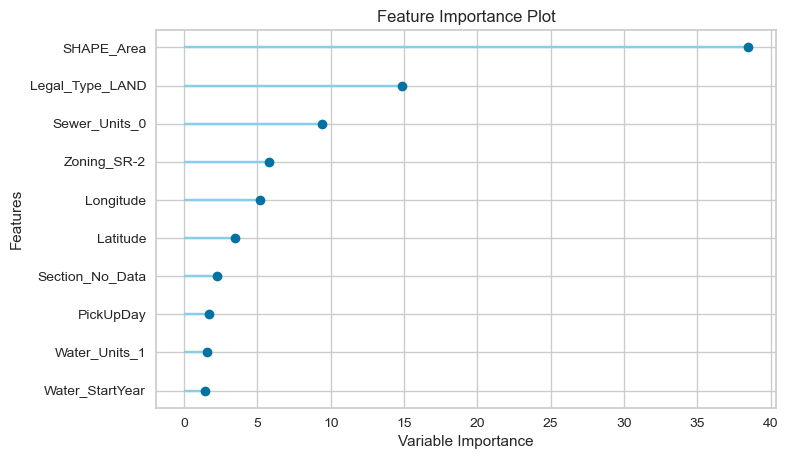

In [36]:
plot_model(catboost, plot='feature')

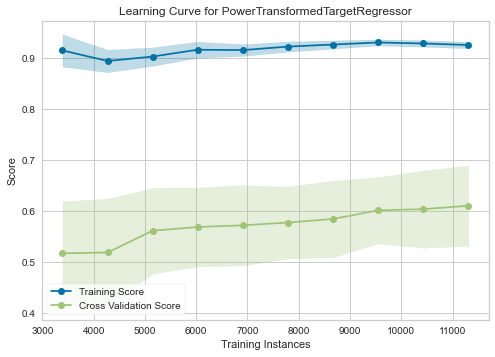

In [51]:
plot_model(catboost, plot='learning')

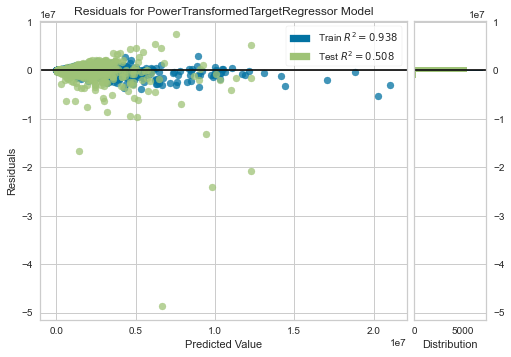

In [37]:
plot_model(catboost, plot='residuals')

In [39]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,135343.7973,276784752486.2824,526103.3667,0.7527,0.5971,443.1381
1,144286.1158,290529684095.9134,539008.0557,0.6897,0.2671,0.1818
2,137545.5891,307394564187.6662,554431.7489,0.6272,0.3146,0.7562
3,122544.1293,168217096782.1938,410142.7761,0.7776,0.2387,0.1519
4,136447.7391,145399151519.9382,381312.4067,0.8010,0.3091,0.4778
5,103334.7424,93854423348.7195,306356.6930,0.8298,0.1705,0.0953
6,128494.8532,225410324044.2030,474773.9715,0.7747,0.3924,103.5361
7,135972.7167,233001653063.3704,482702.4477,0.7199,0.5797,305.0450
8,144629.9499,312078140571.1499,558639.5444,0.7239,0.4265,22.9154
9,142235.4956,522204700883.9563,722637.3232,0.5149,0.2464,0.1411


In [50]:
params = {'depth':[3,1,2,6,4,5,7,8,9,10],
          'iterations':[250,100,500,1000],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,10,20,50,100,200]
         }

In [51]:
catboost_tuned = tune_model(catboost, custom_grid=params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,137415.8755,267296331949.1306,517007.0908,0.7612,0.6301,383.4297
1,146621.7917,282728358285.2790,531722.0686,0.6980,0.2641,0.1797
2,139380.0811,350107847668.8028,591699.1192,0.5754,0.3194,0.8087
3,129072.8080,230978694829.1181,480602.4291,0.6946,0.2363,0.1438
4,142477.6886,170586120119.8486,413020.7260,0.7665,0.3160,0.5085
5,104103.8874,89510014719.6054,299182.2433,0.8376,0.1703,0.0983
6,136252.8438,249257507186.3767,499256.9551,0.7509,0.3966,99.5309
7,140085.2203,243685764508.6826,493645.3834,0.7071,0.5713,290.4898
8,149936.6640,269512960720.5375,519146.3770,0.7615,0.4531,76.4873
9,147683.2336,599391927272.5729,774204.0605,0.4432,0.2608,0.1508


In [52]:
plot_model(catboost_tuned, plot='parameter')

,Parameters
loss_function,RMSE
iterations,500
learning_rate,0.3
depth,4
l2_leaf_reg,10
border_count,200
verbose,False
task_type,CPU
random_state,123
power_transformer_method,box-cox


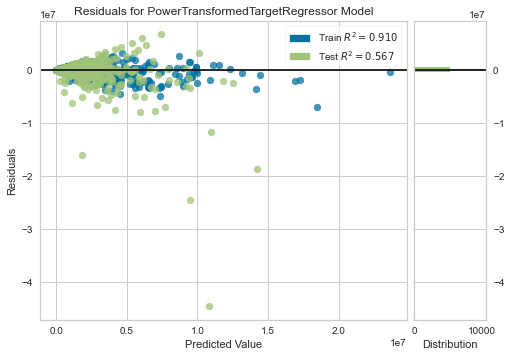

In [53]:
plot_model(catboost_tuned, plot='residuals')

In [54]:
predict_model(catboost_tuned)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,161428.1865,826515832182.0402,909129.1614,0.5674,0.3579,31.1457


,ParcelKey,Sewer_StartYear,Water_StartYear,PickUpDay,SHAPE_Area,Latitude,Longitude,Section_1,Section_10,Section_11,...,Zoning_RM-1,Zoning_RM-2,Zoning_RM-3,Zoning_RM-3A,Zoning_RM-4,Zoning_SR-1,Zoning_SR-2,Zoning_SR-3,Total_Gross_Property_Assessment,Label
0,0.043265,-0.370744,-0.373333,3,-0.465906,1.370801,-0.304251,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,763000.0,7.699166e+05
1,0.948279,-0.370744,-0.373333,1,1.883673,0.724418,-0.571238,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2370000.0,2.811204e+06
2,-0.625016,-0.370744,-0.373333,4,-1.223527,-0.359147,0.282956,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,392000.0,4.919825e+05
3,0.598865,-0.370744,-0.373333,4,0.196161,-1.021574,-1.306084,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,955000.0,8.854504e+05
4,-1.655076,-0.370744,-0.373333,4,2.101548,-1.642460,-0.836974,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1552000.0,2.426489e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5664,-1.173686,2.787635,-0.373333,1,1.915364,1.010496,-1.504359,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1441000.0,1.456532e+06
5665,1.293624,-0.370744,-0.373333,2,-0.945012,-1.187410,1.509460,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,476900.0,4.331459e+05
5666,-0.743988,-0.370744,-0.373333,4,0.103667,-0.444543,0.455951,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1072000.0,1.023632e+06
5667,1.839304,2.788848,3.002603,1,-0.645929,0.452011,-1.427114,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,957000.0,1.001289e+06


In [55]:
catboost_final = finalize_model(catboost_tuned)

In [56]:
unseen_predictions = predict_model(catboost_final, data=data_unseen)

In [82]:
unseen_predictions.tail().style \
                        .format({'Total_Gross_Property_Assessment': "{:,.0f}", 'Label': '{:,.0f}'})

,ParcelKey,Section,ALR,Board_of_Variance,Burning,Development_Permit_Area,Heritage,Heritage_Conserve_Area,Recycling_StartYear,Recycling_Units_BlueBox,Recycling_Units_Toter,Secondary_Suite_Details,Secondary_Suite_ToL_Services,Sewer_StartYear,Sewer_Units,Toters_on_Site,Trees_of_Interest,Water_StartYear,Water_Units,PickUpDay,Residential_Solid_WasteService,SHAPE_Length,SHAPE_Area,Street,Postal_Code,Community,Neighbourhood,Legal_Type,Zoning,Latitude,Longitude,LotSize_sq_ft,Total_Gross_Property_Assessment,Label
2095,102867,14,NOT IN ALR,N,NOT ALLOWED,Y,N,N,1996,1,0,No_Data,No_Data,1996,0,0,N,1996,1,1,Garbage_Green_Recycling,288.604539,4132.024729,204 ST,V2Y,Willoughby,Central Gordon,LAND,SR-2,49.131148,-122.657998,43560.000000,"3,520,000","2,962,476"
2096,114896,14,NOT IN ALR,N,NOT ALLOWED,Y,N,N,1998,1,0,No_Data,No_Data,1996,0,0,N,1996,1,1,Garbage_Green_Recycling,229.230160,2837.295879,204 ST,V2Y,Willoughby,Central Gordon,LAND,SR-2,49.131900,-122.657804,30056.400000,"1,040,000","2,471,682"
2097,127166,14,NOT IN ALR,N,NOT ALLOWED,Y,N,N,1996,1,0,No_Data,No_Data,1996,0,0,N,1996,1,1,Garbage_Green_Recycling,267.605241,4053.087390,202B ST,V2Y,Willoughby,Central Gordon,LAND,SR-2,49.131535,-122.660156,43560.000000,"3,520,000","2,938,512"
2098,104344,26,NOT IN ALR,N,NOT ALLOWED,Y,N,N,1996,1,0,No_Data,No_Data,1996,0,0,N,1996,0,1,Garbage_Green_Recycling,509.103440,11474.085783,200 ST,V2Y,Willoughby,Latimer,LAND,SR-2,49.150683,-122.666593,123274.800000,"9,179,000","5,575,376"
2099,129661,No_Data,NOT IN ALR,N,NOT ALLOWED,N,HI,N,1996,1,0,No_Data,No_Data,1996,0,0,N,1996,1,3,Garbage_Green_Recycling,120.049754,792.999183,MARY AVE,V1M,Fort Langley,No_Data,LAND,R-1E,49.168194,-122.577261,8712.000000,"1,145,000","1,096,089"


In [76]:
from pycaret.utils import check_metric

check_metric(unseen_predictions['Total_Gross_Property_Assessment'], unseen_predictions.Label, 'R2')

0.7014